In [350]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [351]:
uo = 1.
h = 100; g = 10
c = np.sqrt(g*h)
print (c)
om = 2*np.pi/(12.4*3600.)
r = 0.00015
L = 350e3
print (om/c, c/om)

31.6227766017
4.45098040582e-06 224669.602834


In [352]:
kp = np.sqrt(0.5*(om**2/c**2+np.sqrt(om**4/c**4+r**2*om**2/c**4)))
km = -np.sqrt(0.5*(om**2/c**2+np.sqrt(om**4/c**4+r**2*om**2/c**4)))
lp = -r*om/(2*kp*c**2)
lm = -r*om/(2*km*c**2)
print (kp, km, lp, lm)

4.93779072897e-06 -4.93779072897e-06 -2.13788463441e-06 2.13788463441e-06


Four waves:
- u1 exp(lp x) cos(kp x - om t)
- u2 exp(lp x) sin(kp x - om t)
- u3 exp(lm x) cos(km x - om t)
- u4 exp(lm x) sin(km x - om t)

Sines:
- u2 + u4 = 0
Cosines:
- u1 exp(lp L) cos(kp L) + u2 exp(lp L) sin(kp L) + u3 exp (lm L) cos(km L) + u4 exp (lm L) sin(km L) = 0


Cosines:
- u1 + u3 = uo
Sinces
- u1 exp(lp L) sin(kp L) - u2 exp(lp L) cos(kp L) + u3 exp (lm L) sin(km L) - u4 exp (lm L) cos(km L) = 0

In [353]:
Matrix = [[0,1,0,1],
          [np.exp(lp*L)*np.cos(kp*L), np.exp(lp*L)*np.sin(kp*L), 
           np.exp(lm*L)*np.cos(km*L), np.exp(lm*L)*np.sin(km*L)],
          [1,0,1,0],
          [np.exp(lp*L)*np.sin(kp*L), -np.exp(lp*L)*np.cos(kp*L), 
           np.exp(lm*L)*np.sin(km*L), -np.exp(lm*L)*np.cos(km*L)],]
print (Matrix, -np.exp(lm*L)*np.sin(km*L))
rhs = [0,0,uo,0]

[[0, 1, 0, 1], [-0.074187069729187816, 0.4673376228298563, -0.33132809786938039, -2.0871842788810659], [1, 0, 1, 0], [0.4673376228298563, 0.074187069729187816, -2.0871842788810659, 0.33132809786938039]] 2.08718427888


In [354]:
xu = np.linalg.solve(Matrix, rhs)
print (xu)
u1, u2, u3, u4 = xu

[ 0.82178391  0.0469809   0.17821609 -0.0469809 ]


In [355]:
xx = np.arange(0,L*(1+1/25.),L/25.)
tt = np.arange(0,2*np.pi,np.pi/10.)
x,t = np.meshgrid(xx,tt)

In [356]:
u = (u1 * np.exp(lp*x) * np.cos(kp*x-t) + u2 * np.exp(lp*x) * np.sin(kp*x-t) 
     + u3 * np.exp(lm*x) * np.cos(km*x-t) + u4 * np.exp(lm*x) * np.sin(km*x-t) )

(0, 385000.00000000006)

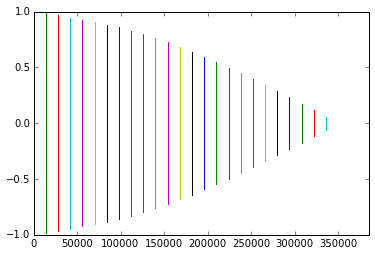

In [357]:
plt.plot(x,u);
plt.xlim((0,L*1.1))

In [358]:
eta = (u1 * lp * np.exp(lp*x) * np.cos(kp*x-t) - u1 * kp * np.exp(lp*x) * np.sin(kp*x-t) 
     + u2 * lp * np.exp(lp*x) * np.sin(kp*x-t) + u2 * kp * np.exp(lp*x) * np.cos(kp*x-t) 
     + u3 * lm * np.exp(lm*x) * np.cos(km*x-t) - u3 * km * np.exp(lm*x) * np.sin(km*x-t) 
     + u4 * lm * np.exp(lm*x) * np.sin(km*x-t) + u4 * km * np.exp(lm*x) * np.cos(km*x-t))/om
amp = np.sqrt((u1 * lp * np.exp(lp*x)) **2 + (u1 * kp * np.exp(lp*x))**2 
     + (u2 * lp * np.exp(lp*x))**2 + (u2 * kp * np.exp(lp*x))** 2
     + (u3 * lm * np.exp(lm*x))**2 + (u3 * km * np.exp(lm*x))**2
     + (u4 * lm * np.exp(lm*x))**2 + (u4 * km * np.exp(lm*x))**2)/om

(26,) (20, 26)
0.00015 350000.0 100


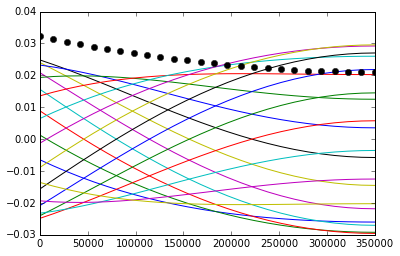

In [359]:
print (eta[0,:].shape, x.shape)
for i,it in enumerate(tt):
    plt.plot(x[i,:],eta[i,:]);
plt.plot(x[1,:],amp[1,:],'o')
print (r, L, h)

In [360]:
print (x.shape, t.shape)
eta = (u1 * lp * np.exp(lp*x) * np.cos(kp*x-t) - u1 * kp * np.exp(lp*x) * np.sin(kp*x-t) 
     + u2 * lp * np.exp(lp*x) * np.sin(kp*x-t) + u2 * kp * np.exp(lp*x) * np.cos(kp*x-t) 
     + u3 * lm * np.exp(lm*x) * np.cos(km*x-t) - u3 * km * np.exp(lm*x) * np.sin(km*x-t) 
     + u4 * lm * np.exp(lm*x) * np.sin(km*x-t) + u4 * km * np.exp(lm*x) * np.cos(km*x-t))/om
eta1 = (u1 * lp * np.exp(lp*x) * np.cos(kp*x-t) - u1 * kp * np.exp(lp*x) * np.sin(kp*x-t) 
     + u2 * lp * np.exp(lp*x) * np.sin(kp*x-t) + u2 * kp * np.exp(lp*x) * np.cos(kp*x-t) )/om
eta2 = (u3 * lm * np.exp(lm*x) * np.cos(km*x-t) - u3 * km * np.exp(lm*x) * np.sin(km*x-t) 
     + u4 * lm * np.exp(lm*x) * np.sin(km*x-t) + u4 * km * np.exp(lm*x) * np.cos(km*x-t))/om

(20, 26) (20, 26)


(26,) (20, 26)


(-0.06, 0.06)

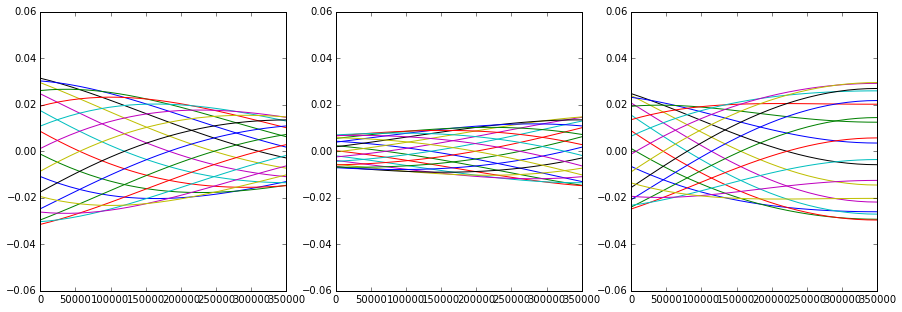

In [361]:
print (eta1[0,:].shape, x.shape)
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i,it in enumerate(tt):
    axs[0].plot(x[i,:],eta1[i,:])
    axs[1].plot(x[i,:],eta2[i,:])
    axs[2].plot(x[i,:],eta[i,:])
axs[0].set_ylim((-0.06,0.06))
axs[1].set_ylim((-0.06,0.06))
axs[2].set_ylim((-0.06,0.06))

(26,) (20, 26)
0.00015 350000.0 100


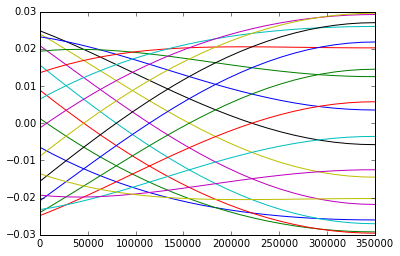

In [362]:
print (eta[0,:].shape, x.shape)

for i,t in enumerate(tt):
    plt.plot(x[i,:],eta[i,:]);
print (r, L, h)